In [1]:
import pandas as pd

# Create the dataset
data = {
    'Trip Duration': [320, 1450, 800, 180, 620, 240, 960, 1320, 300, 480],
    'Start Time': [
        '2010-10-01 08:15:00', '2010-10-02 09:20:00', '2010-10-03 14:00:00',
        '2010-11-01 17:45:00', '2010-11-02 06:30:00', '2010-11-03 08:00:00',
        '2010-12-01 13:15:00', '2010-12-02 15:25:00', '2010-12-03 19:10:00',
        '2010-12-04 11:50:00'
    ],
    'End Time': [
        '2010-10-01 08:20:00', '2010-10-02 09:44:00', '2010-10-03 14:13:00',
        '2010-11-01 17:48:00', '2010-11-02 06:41:00', '2010-11-03 08:04:00',
        '2010-12-01 13:31:00', '2010-12-02 15:47:00', '2010-12-03 19:20:00',
        '2010-12-04 12:00:00'
    ],
    'Start Station': [
        'Broadway & W 60 St', 'Central Park', '8 Ave & W 33 St',
        'Broadway & W 60 St', 'Central Park', '8 Ave & W 33 St',
        'Broadway & W 60 St', 'Central Park', '8 Ave & W 33 St',
        'Broadway & W 60 St'
    ],
    'End Station': [
        'Central Park', '8 Ave & W 33 St', 'Broadway & W 60 St',
        'Central Park', '8 Ave & W 33 St', 'Broadway & W 60 St',
        'Central Park', '8 Ave & W 33 St', 'Broadway & W 60 St',
        'Central Park'
    ],
    'Bike ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'User Type': ['Subscriber', 'Customer', 'Subscriber', 'Customer',
                  'Subscriber', 'Subscriber', 'Customer', 'Customer',
                  'Subscriber', 'Customer']
}

df = pd.DataFrame(data)

# Save as CSV
df.to_csv("trip_history_custom_dataset.csv", index=False)
print("✅ Dataset saved as 'trip_history_custom_dataset.csv'")

✅ Dataset saved as 'trip_history_custom_dataset.csv'


Dataset Preview:
   Trip Duration           Start Time             End Time  \
0            320  2010-10-01 08:15:00  2010-10-01 08:20:00   
1           1450  2010-10-02 09:20:00  2010-10-02 09:44:00   
2            800  2010-10-03 14:00:00  2010-10-03 14:13:00   
3            180  2010-11-01 17:45:00  2010-11-01 17:48:00   
4            620  2010-11-02 06:30:00  2010-11-02 06:41:00   

        Start Station         End Station  Bike ID   User Type  
0  Broadway & W 60 St        Central Park      101  Subscriber  
1        Central Park     8 Ave & W 33 St      102    Customer  
2     8 Ave & W 33 St  Broadway & W 60 St      103  Subscriber  
3  Broadway & W 60 St        Central Park      104    Customer  
4        Central Park     8 Ave & W 33 St      105  Subscriber  

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                    

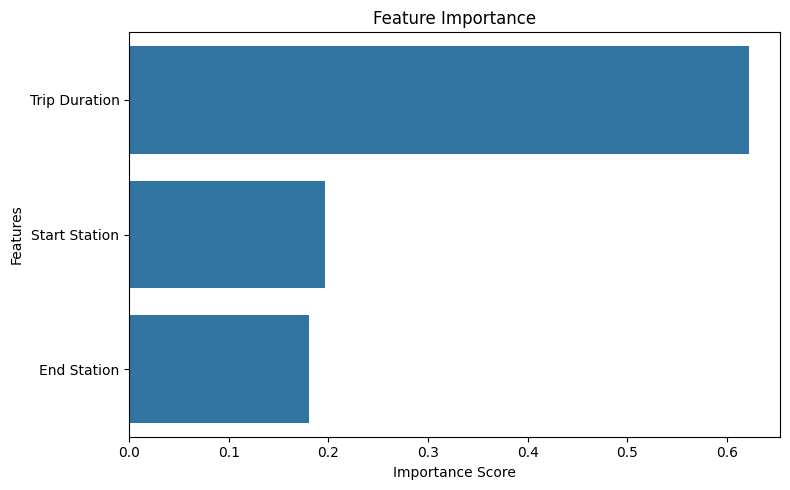

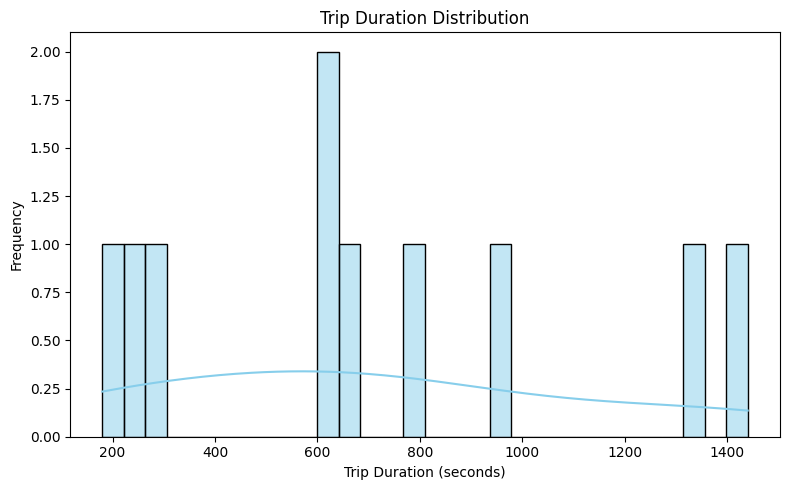

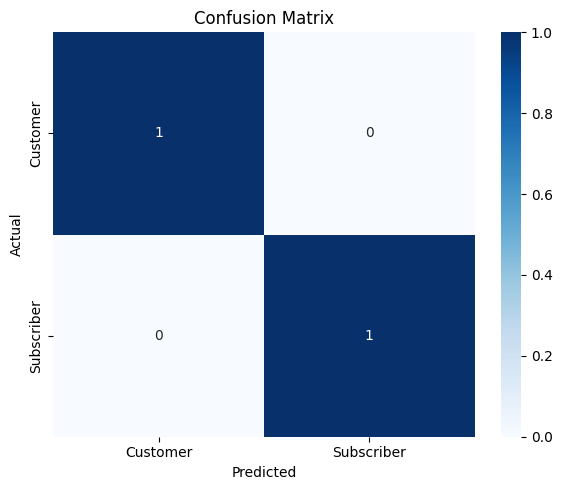

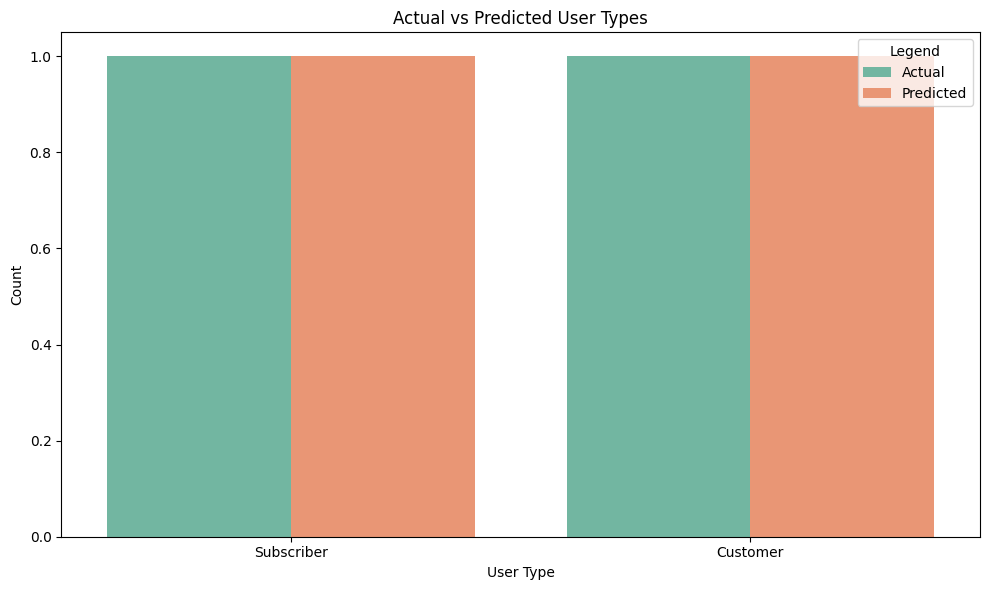


Sample Predictions:
Predicted: Subscriber, Actual: Subscriber
Predicted: Customer, Actual: Customer


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('trip_history_custom_dataset.csv')

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Drop rows with any missing values
df = df.dropna()

# Convert 'Start Time' and 'End Time' to datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Extract additional feature: 'Trip Duration'
df['Trip Duration'] = df['End Time'] - df['Start Time']
df['Trip Duration'] = df['Trip Duration'].dt.total_seconds()  # Convert to seconds

# Encode categorical columns
label_encoder = LabelEncoder()
df['Start Station'] = label_encoder.fit_transform(df['Start Station'])
df['End Station'] = label_encoder.fit_transform(df['End Station'])
df['User Type'] = label_encoder.fit_transform(df['User Type'])

# Define features and target
X = df[['Trip Duration', 'Start Station', 'End Station']]
y = df['User Type']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report and Accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# -------------------------------
# 📊 Feature Importance Plot
# -------------------------------
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# -------------------------------
# 📊 Trip Duration Distribution
# -------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df['Trip Duration'], bins=30, kde=True, color='skyblue')
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# -------------------------------
# 📊 Confusion Matrix
# -------------------------------
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# -------------------------------
# 📊 Actual vs Predicted Comparison
# -------------------------------
# Convert encoded values back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})

# Plot Actual vs Predicted Count
plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df.melt(), x='value', hue='variable', palette='Set2')
plt.title('Actual vs Predicted User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Legend')
plt.tight_layout()
plt.show()

# -------------------------------
# Sample Predictions Display
# -------------------------------
print("\nSample Predictions:")
for i in range(len(y_test)):
    print(f"Predicted: {label_encoder.inverse_transform([y_pred[i]])[0]}, Actual: {label_encoder.inverse_transform([y_test.iloc[i]])[0]}")